# Multiplication Case Study

Recently I came across a video regarding Karatsuba's Fast Multiplication Algorithm (https://www.youtube.com/watch?v=cCKOl5li6YM&t=788s) and decided to implement it in python. I followed the pseudocode from wikipedia regarding the algorithm (https://en.wikipedia.org/wiki/Karatsuba_algorithm) to implement my method. 

To examine the effect that using Karatsuba's Fast Multiplication Algorithm has on real-time computations, I also implemented a standard elementary-school long multiplcation algorithm. To compare the two, I added operation counters within both methods that keep track of the respective number of  addition and multiplication calculations being performed. 

Finally, I simulated both algorithms being called 200 times for numbers ranging from 1 to upperBound (in my case 15) digits, averaged the operations performed and graphed them against the respective number of digits. 

This resulted in the graph shown below that highlights the standard multiplication algorithm following the n^2 curve, while the Karatsuba multiplcation algorithm roughly follows an n^1.58 curve.

![Plot](Images/plot.JPG)

*Note: The n^2 line overlaps the standard algorithm curve.*
*Note: The Karatsuba operation count may not be completely accurate which results in the respective line not following the n^1.58 curve as closely as I had hoped. *


In [3]:
# handle imports
import matplotlib.pyplot as plt
from random import randint
import numpy as np

In [8]:
# initialize global variables
standard_sum_operations = 0
standard_product_operations = 0
karatsuba_sum_operations = 0
karatsuba_product_operations = 0

In [9]:
# define standard long multiplication algorithm
def standard(a, b):
    global standard_sum_operations, standard_product_operations
    a_list = [int(x) for x in str(a)]
    a_list.reverse()
    b_list = [int(x) for x in str(b)]
    b_list.reverse()
    
    product = [0 for x in range(len(a_list) + len(b_list))]

    for b_counter in range(len(b_list)):
        carry = 0
        for a_counter in range(len(a_list)):
            product[a_counter + b_counter] += carry + a_list[a_counter] * b_list[b_counter]
            standard_sum_operations += 1
            standard_product_operations += 1
            carry = int(product[a_counter + b_counter] / 10)
            product[a_counter + b_counter] = product[a_counter + b_counter] % 10
        product[b_counter + len(a_list)] = carry
        standard_sum_operations += 1

    product.reverse()
    return int(sum(d * 10**i for i, d in enumerate(product[::-1])))

In [14]:
# test standard method
standard_sum_operations = 0
standard_product_operations = 0
print(standard(12345678910,10987654321))
print(standard_sum_operations)
print(standard_product_operations)

135650052221140070110
132
121


In [7]:
# define karatsuba multiplication algorithm
def karatsuba(a, b):
    global karatsuba_sum_operations, karatsuba_product_operations
    if (a < 10) or (b < 10):
        return a * b

    m = min(len(str(a)), len(str(b)))
    m2 = m // 2

    h1 = a // 10**m2
    l1 = a % 10**m2
    h2 = b // 10**m2
    l2 = b % 10**m2

    z0 = karatsuba(l1, l2)
    z1 = karatsuba(l1 + h1, l2 + h2)
    z2 = karatsuba(h1, h2)

    karatsuba_product_operations += 1
    karatsuba_sum_operations += 3
    return (z2 * 10**(m2*2)) + ((z1 - z2 - z0) * 10**m2) + z0

In [11]:
# test karatsuba method
karatsuba_sum_operations = 0
karatsuba_product_operations = 0
print(karatsuba(6885,1600))
print(karatsuba_sum_operations)
print(karatsuba_product_operations)

11016000
9
3


In [16]:
# define simulation
def simulate():
    global standard_product_operations, karatsuba_product_operations
    upperBound = 15
    digits = [x for x in range(1, upperBound)]
    standard_operations = []
    karatsuba_operations = []

    # num of digits
    for i in range(1, upperBound):
        # num of tries
        total_standard_operations = 0
        total_karatsuba_operations = 0
        for j in range(200):
            standard_product_operations = 0
            karatsuba_product_operations = 0
            standard_sum_operations = 0
            karatsuba_sum_operations = 0

            a = randint(pow(10, i - 1), pow(10, i))
            b = randint(pow(10, i - 1), pow(10, i))

            standard(a, b)
            karatsuba(a, b)

            total_standard_operations += standard_product_operations + standard_sum_operations
            total_karatsuba_operations += karatsuba_product_operations + karatsuba_sum_operations

        average_standard_operations = total_standard_operations / 200
        average_karatsuba_operations = total_karatsuba_operations / 200

        standard_operations.append(average_standard_operations)
        karatsuba_operations.append(average_karatsuba_operations)
    
    # plotting
    plt.plot(digits, standard_operations, label="Standard Operations")
    plt.plot(digits, karatsuba_operations, label="Karatsuba Operations")
    x = np.linspace(0, upperBound)
    y = x**2
    plt.plot(x, y, label="n^2")
    y = x**1.58
    plt.plot(x, y, label="n^1.58")

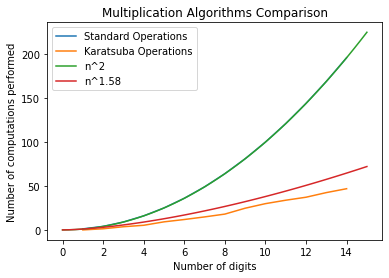

In [17]:
# run simulation & display plot
simulate()
plt.legend()
plt.title("Multiplication Algorithms Comparison")
plt.xlabel("Number of digits")
plt.ylabel("Number of computations performed")
plt.show()